# Logistic Regression
You should build a machine learning pipeline using a logistic regression model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a logistic regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [1]:
import pandas as pd
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.metrics

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 0.1: Import the XAI methods

In [2]:
!pip install shap
!pip install lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=aeac183868f93bef778a5a95b51a0de0004cd339cd297c16d23e4b3f65efe9ca
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [3]:
import shap
shap.initjs()
import lime

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/main/datasets/mnist.csv')
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2: Splitting the Dataset

In [5]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

print ('df size: ', df.shape)
print ('df_train size: ', df_train.shape)
print ('df_test size: ', df_test.shape)

df size:  (4000, 786)
df_train size:  (3000, 786)
df_test size:  (1000, 786)


# Data Preprocessing and Feature Engineering

## Step 3: Identifying implicit missing values of attributes and replace them with explicit missing values

In [6]:
df_train.dtypes

,0
id,int64
class,int64
pixel1,int64
pixel2,int64
pixel3,int64
...,...
pixel780,int64
pixel781,int64
pixel782,int64
pixel783,int64


## Step 3.1: Checking for Null and NaN in Dataset

In [7]:
df_train.isnull().sum()

,0
id,0
class,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [8]:
df_train.isna().sum()

,0
id,0
class,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [9]:
df_train['class'].value_counts()

,count
class,
1,352
7,333
8,315
3,306
2,294
6,288
9,283
5,279
0,279


<Axes: xlabel='class'>

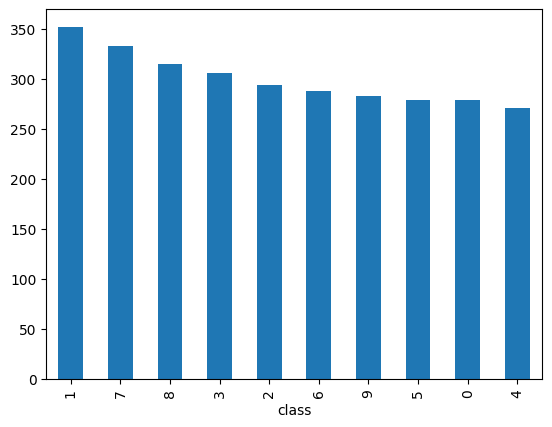

In [10]:
df_train['class'].value_counts().plot(kind = 'bar')

## Step 4: Now we use the df_train

In [11]:
x_train = df_train.drop(['id','class'], axis = 1)
y_train = df_train['class']

x_test = df_test.drop(['id','class'], axis = 1)
y_test = df_test['class']

###########################

print('x_train size: ', x_train.shape)
print('y_train size: ', y_train.shape)

print('x_test size: ', x_test.shape)
print('y_test size: ', y_test.shape)

x_train size:  (3000, 784)
y_train size:  (3000,)
x_test size:  (1000, 784)
y_test size:  (1000,)


## Step 5: Data Transformation

In [12]:
numerical_attributes = x_train.select_dtypes(include = ['int64']).columns.tolist()

ct = sklearn.compose.ColumnTransformer([
    ('standard_scaling', sklearn.preprocessing.StandardScaler(), numerical_attributes)
])

ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print ('x_train size: ', x_train.shape)
print ('y_train size: ', y_train.shape)
print ('x_test size: ', x_test.shape)
print ('y_test size: ', y_test.shape)

x_train size:  (3000, 784)
y_train size:  (3000,)
x_test size:  (1000, 784)
y_test size:  (1000,)


In [13]:
model = sklearn.linear_model.LogisticRegression()
result = model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Step 6: Model Assessment

In [14]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
import statsmodels.api as sm
print(y_predicted)
print(accuracy)

[8 5 0 9 1 9 5 3 3 4 3 8 1 1 3 1 2 8 3 2 9 8 0 3 3 6 4 3 5 9 5 4 9 4 6 0 6
 3 7 5 1 0 4 7 6 6 3 1 4 1 8 2 2 2 9 5 7 4 2 8 1 2 2 9 2 2 1 1 1 1 6 8 7 1
 6 1 2 7 9 8 1 5 9 6 2 1 9 7 0 3 2 8 3 6 8 0 8 3 0 4 8 2 9 2 2 9 3 5 3 1 0
 1 8 9 5 8 8 1 0 7 1 7 2 3 3 4 3 1 2 4 1 7 1 4 9 1 8 5 8 0 9 3 5 0 9 2 0 9
 3 2 6 0 4 6 3 1 3 7 5 1 6 0 8 2 2 5 9 6 1 9 0 0 3 3 8 5 1 1 3 2 4 6 3 9 3
 9 5 6 2 6 4 1 4 8 6 1 5 8 8 3 1 8 6 1 9 1 3 9 2 9 6 5 9 8 1 3 4 6 6 3 0 2
 8 4 6 9 4 6 7 4 3 2 2 1 9 4 3 1 7 4 3 9 6 0 3 8 7 7 4 9 6 2 6 8 1 4 2 7 1
 8 2 0 9 6 5 9 7 4 9 6 4 6 2 6 9 0 3 2 7 4 4 7 3 8 6 7 8 3 1 6 6 6 6 7 0 7
 4 0 1 8 1 0 4 5 7 3 3 3 5 8 6 0 0 6 7 3 3 8 7 2 9 8 2 2 2 9 4 0 6 8 1 3 6
 0 1 6 0 1 4 6 1 2 8 7 9 1 5 2 6 2 6 5 0 4 2 4 7 0 4 4 8 1 2 7 2 0 4 0 1 7
 3 0 2 8 7 4 3 5 3 3 4 5 3 8 7 1 1 7 2 8 3 0 2 5 2 4 2 2 5 1 0 5 0 5 9 1 5
 0 9 3 9 8 3 8 1 7 3 1 6 6 2 3 5 1 5 1 6 8 8 2 4 6 9 3 0 6 5 0 5 1 3 0 3 1
 8 1 8 0 4 2 2 2 1 4 1 2 6 7 8 4 9 8 6 4 3 0 3 5 7 3 6 5 1 7 5 8 7 8 4 1 5
 3 2 8 3 0 0 1 8 4 9 5 0 

Text(0.5, 0, 'Actual Number')

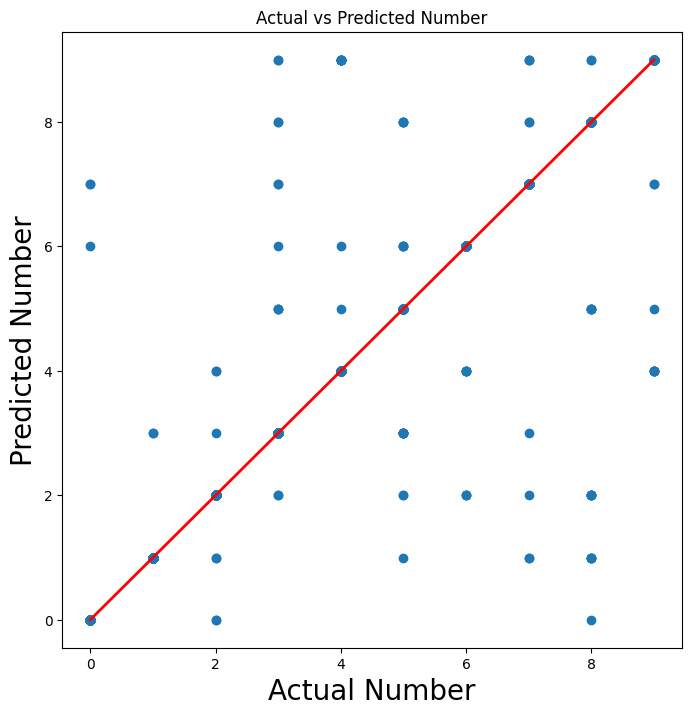

In [15]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_predicted)
plt.plot([0,9], [0,9], color = 'red', linestyle = '-', linewidth = 2)
plt.title('Actual vs Predicted Number')

plt.ylabel('Predicted Number', size = 20)
plt.xlabel('Actual Number', size = 20)

In [17]:
explainer = shap.LinearExplainer(model, x_train)
shap_values = explainer(x_test)
shap.plots.waterfall(shap_values[0])

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (784, 10)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [ ]:
shap.plots.force(shap_values[67], matplotlib= True)

In [ ]:
shap.plots.bar(shap_values[67])

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.heatmap(shap_values)